In [1]:
# testing stream burning algo

In [13]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
demf = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/puhti_dem_32m.tif'
streamf = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/maastotietokanta/virtavesikapea.asc'

with rasterio.open(demf) as src:
    dem = src.read(1)
#with rasterio.open(streamf) as src:
#    stream = src.read(1)

In [75]:
def burn_stream_to_dem(dem_fp, stream_fp, k=0.1, H=2.0, save_in='asc'):
    '''
    function to burn streams to dem (similar to that of whitebox)
    dem_fp
    stream_fp
    k = parameter
    H = parameter
    save_in
    '''

    fp = dem_fp[:-4]
    out_fp = str(fp + '_burned_streams')
    
    if save_in == 'geotiff':
        out_fp = out_fp + '.tif'
    elif save_in == 'asc':
        out_fp = out_fp + '.asc'
        
    with rasterio.open(dem_fp) as dem_ras:
        dem_arr = dem_ras.read(1)
        out_meta = dem_ras.meta.copy()
        reso = out_meta['transform'][0]
    with rasterio.open(stream_fp) as stream_ras:
        stream_arr = stream_ras.read(1)

    # finding vectors of each stream cell
    stream_vectors_temp = np.where(stream_arr > 0)
    stream_vectors = np.zeros(shape=[len(stream_vectors_temp[0]),2])

    for i in range(len(stream_vectors_temp[0])):
        stream_vectors[i] = stream_vectors_temp[0][i], stream_vectors_temp[1][i]
    
    dist_to_stream = np.zeros(dem_arr.shape)
    # looping through raster to find min distance to stream vectors
    for row in range(dem_arr.shape[0]):
        for col in range(dem_arr.shape[1]):
            centroid = [row, col]
            dist_to_stream[row,col] = np.min(np.linalg.norm(centroid - stream_vectors, axis=1))*reso

    new_dem = dem_arr - (reso / (reso + dist_to_stream))**k * H

    with rasterio.Env():
        with rasterio.open(out_fp, 'w', **out_meta, force_cellsize=True) as dst:
            src = dst.write(new_dem, 1)
    
    return new_dem

In [76]:
dts = burn_stream_to_dem(dem_fp=demf, stream_fp=streamf)

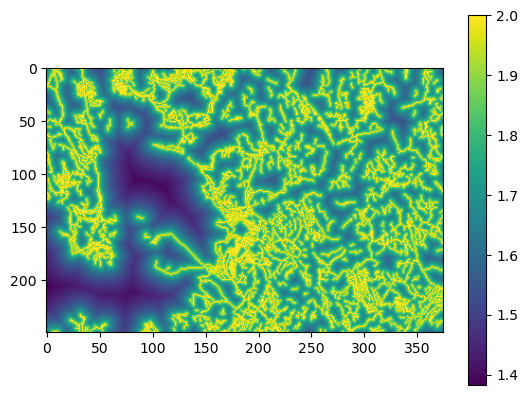

In [77]:
plt.imshow(dem-dts); plt.colorbar()

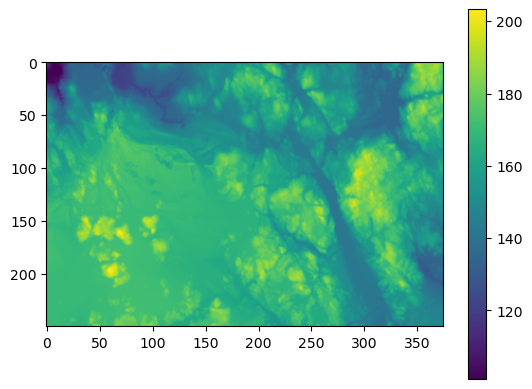

In [26]:
plt.imshow(dem); plt.colorbar()

In [ ]:
with rasterio.open(out_fp) as src:
    test = src.read(1)
    testm = src.meta.copy()
print(testm)
plt.imshow(test)

In [3]:
stream_vectors = np.where(stream > 0)
stream_vectors
print(stream_vectors)
strms = np.zeros(shape=[len(stream_vectors[0]),2])
for i in range(len(stream_vectors[0])):
    strms[i] = stream_vectors[0][i], stream_vectors[1][i]
print(strms)

(array([  0,   0,   0, ..., 249, 249, 249]), array([  5,   6,  14, ..., 332, 338, 339]))
[[  0.   5.]
 [  0.   6.]
 [  0.  14.]
 ...
 [249. 332.]
 [249. 338.]
 [249. 339.]]


In [8]:
dist_to_stream = np.zeros(dem.shape)
stream_vectors = np.where(stream > 0)
for row in range(dem.shape[0]):
    for col in range(dem.shape[1]):
        centroid = [row, col]
        dist_to_stream[row,col] = np.min(np.linalg.norm(centroid - strms, axis=1))*32
        
        #for i in range(len(stream_vectors[0])):
        #    distance.append(dist((row, col), (stream_vectors[0][i], stream_vectors[1][i])))
        #dist_to_stream[row, col] = min(distance)

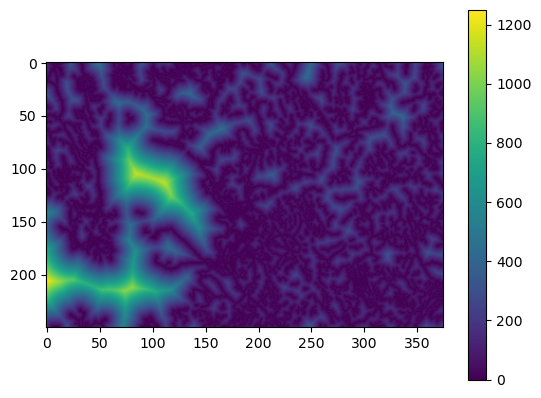

In [9]:
plt.imshow(dist_to_stream); plt.colorbar()